In [17]:
from sklearn.metrics import classification_report

# Naive Bayes için classification report
print("Naive Bayes Classification Report:")
nb_report = classification_report(y_test, y_pred_nb)
print(nb_report)

# Karar Ağacı için classification report
print("Decision Tree Classification Report:")
dt_report = classification_report(y_test, y_pred_dt)
print(dt_report)


Naive Bayes Classification Report:
                                precision    recall  f1-score   support

           3D / Grafik Tasarım       0.75      0.81      0.78        77
           Acentecilik Hizmeti       0.00      0.00      0.00         7
                        Analiz       0.00      0.00      0.00        10
                    Anketörlük       0.00      0.00      0.00         2
                          Arge       0.69      0.96      0.80       474
                    Asistanlık       0.00      0.00      0.00        20
                     Avukatlık       0.71      0.95      0.81       338
                  Ağ / Network       0.00      0.00      0.00         9
                       Aşçılık       0.70      0.68      0.69        94
                Bakım / Onarım       0.00      0.00      0.00         2
                 Bayi Yönetimi       0.00      0.00      0.00         1
               Bilgi Güvenliği       0.00      0.00      0.00        16
              Bilgi Sistemle

c:\Users\atahan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\atahan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\atahan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [9]:
from sklearn.metrics import accuracy_score

# Naive Bayes başarı oranı hesaplamak için kullandığım 'accuracy_score' methodu
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Başarı Oranı: {accuracy_nb * 100:.2f}%")

# Karar Ağacı başarı oranını hesaplamak için kullandığım 'accuracy_score' methodu
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Karar Ağacı Başarı Oranı: {accuracy_dt * 100:.2f}%")

Naive Bayes Başarı Oranı: 60.08%
Karar Ağacı Başarı Oranı: 68.08%


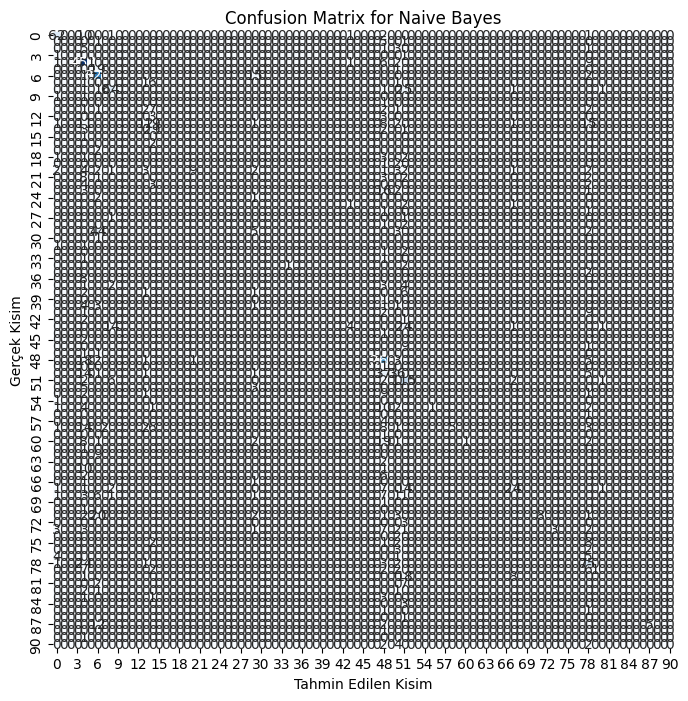

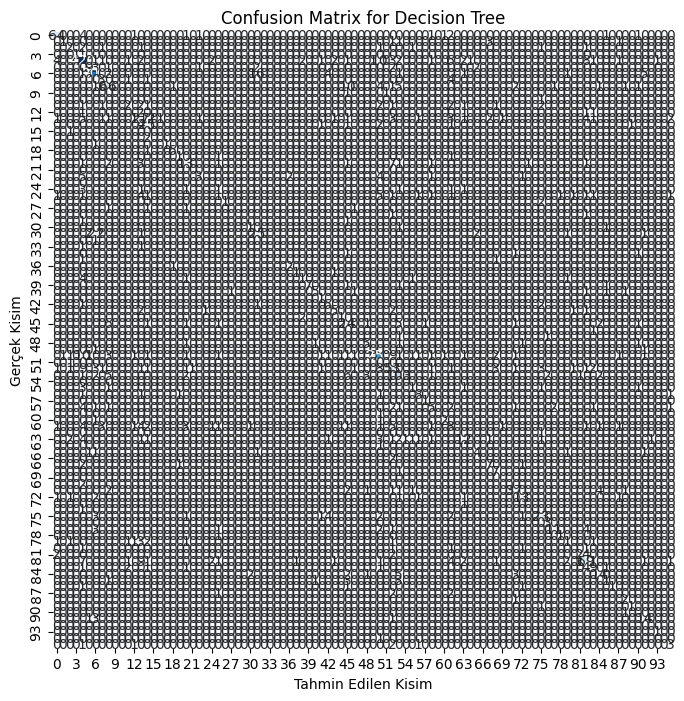

In [12]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix oluşturdum
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Plot kısım için oluşturduğum fonksiyon burada plot kıskmlara 'Gerçek Kisim' ve 'Tahmin Edilen Kisim' olmak üzere iki tane label(etiket) atadım
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.ylabel('Gerçek Kisim')
    plt.xlabel('Tahmin Edilen Kisim')
    plt.show()

# Naive Bayes için oluşturduğum conf. matrix
plot_confusion_matrix(cm_nb, 'Confusion Matrix for Naive Bayes')

# Karar Ağacı için oluşturduğum conf. matrix
plot_confusion_matrix(cm_dt, 'Confusion Matrix for Decision Tree')

In [7]:
from sklearn.tree import DecisionTreeClassifier

# Karar ağacı modelini eğittim
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_vec, y_train)

# Karar ağacı modelininde tahmin yapması için aynı fonksiyondan yararlandım
y_pred_dt = dt_model.predict(X_test_vec)

In [6]:
from sklearn.naive_bayes import MultinomialNB

# Naive Bayes modelini eğittim
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

# Modelin tahmin yapması için 'predict' fonksiyonunu kullandım
y_pred_nb = nb_model.predict(X_test_vec)

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

# Metin verilerini sayısal verilere çevirme işlemini 'Countvectorizer' fonksiyonu ile sağladım

vectorizer = CountVectorizer()

X_train_vec = vectorizer.fit_transform(X_train)

X_test_vec = vectorizer.transform(X_test)

In [4]:
from sklearn.model_selection import train_test_split

# 'Özellikler' ve hedef değişkeni ayırdığım
X = combined_jobs['Qualifications']  # Özellikler (nitelikler)
y = combined_jobs['sub-classification']  # Hedef değişken (sub-classification)

# Veriyi eğittim ve test setlerine ayırdım 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
#Verileri tek bir kümede birleştirdim
combined_jobs = pd.concat([jobs_it_sub, jobs_law_sub, jobs_rd_sub, jobs_service_sub, jobs_strategy_sub], ignore_index=True)

#sadece gerekli sütünları tuttum ve 'sub classification' eksik olan satırları çıkardım

combined_jobs = combined_jobs[['DigerPozisyon', 'Qualifications', 'sub-classification']].dropna()

#Veri kümesini görüntülemek için fonksiyon
combined_jobs.head()

,DigerPozisyon,Qualifications,sub-classification
0,Bilgi Giriş Elemanı,<p>İlan metninizde yayına uygun olmayan bir ke...,Veri Girişi
1,Bilgi İşlem Asistanı Logo,"<p color=""""><strong>Lorem Ipsum</strong>&nbsp;...",Bilgi İşlem
2,Yazılım Destek Elemanı,<p>Yazılım Destek ElemanıYazılım Destek Eleman...,Yazılım Destek / Test
3,Yazılım Destek Elemanı,<p>Yazılım Destek ElemanıYazılım Destek Eleman...,Yazılım Destek / Test
4,Yazılım Geliştirme Mühendisi,<p>Aktif Satış Grup MüdürüAktif Satış Grup Müd...,Yazılım


In [1]:
import pandas as pd

# Verileri yükledim
jobs_it_sub = pd.read_csv('C:/Users/atahan/Desktop/Data2/Jobs_IT_Sub.csv')
jobs_law_sub = pd.read_csv('C:/Users/atahan/Desktop/Data2/Jobs_Law_Sub.csv')
jobs_rd_sub = pd.read_csv('C:/Users/atahan/Desktop/Data2/Jobs_RD_Sub.csv')
jobs_service_sub = pd.read_csv('C:/Users/atahan/Desktop/Data2/Jobs_Service_Sub.csv')
jobs_strategy_sub = pd.read_csv('C:/Users/atahan/Desktop/Data2/Jobs_Strategy_Sub.csv')

# Verileri birleştirdim
combined_jobs = pd.concat([jobs_it_sub, jobs_law_sub, jobs_rd_sub, jobs_service_sub, jobs_strategy_sub], ignore_index=True)

# Gereksiz satır ve sütunları kaldırdım, boş verileri attım
combined_jobs = combined_jobs[['Qualifications', 'sub-classification']].dropna()

# Veri çerçevesini kontrol ettim
print(combined_jobs.head())

# Her dataset için incelecek subclassları ayırdım
jobs_it_sub.head(), jobs_law_sub.head(), jobs_rd_sub.head(), jobs_service_sub, jobs_strategy_sub


                                      Qualifications     sub-classification
0  <p>İlan metninizde yayına uygun olmayan bir ke...            Veri Girişi
1  <p color=""><strong>Lorem Ipsum</strong>&nbsp;...            Bilgi İşlem
2  <p>Yazılım Destek ElemanıYazılım Destek Eleman...  Yazılım Destek / Test
3  <p>Yazılım Destek ElemanıYazılım Destek Eleman...  Yazılım Destek / Test
4  <p>Aktif Satış Grup MüdürüAktif Satış Grup Müd...                Yazılım


(   JobRefNo                 DigerPozisyon  \
 0   3464151           Bilgi Giriş Elemanı   
 1   3464150     Bilgi İşlem Asistanı Logo   
 2   3464145        Yazılım Destek Elemanı   
 3   3464144        Yazılım Destek Elemanı   
 4   3464133  Yazılım Geliştirme Mühendisi   
 
                                       Qualifications     sub-classification  
 0  <p>İlan metninizde yayına uygun olmayan bir ke...            Veri Girişi  
 1  <p color=""><strong>Lorem Ipsum</strong>&nbsp;...            Bilgi İşlem  
 2  <p>Yazılım Destek ElemanıYazılım Destek Eleman...  Yazılım Destek / Test  
 3  <p>Yazılım Destek ElemanıYazılım Destek Eleman...  Yazılım Destek / Test  
 4  <p>Aktif Satış Grup MüdürüAktif Satış Grup Müd...                Yazılım  ,
    JobRefNo            DigerPozisyon  \
 0   3463993                   Avukat   
 1   3463712         Corporate Lawyer   
 2   3462810                   Avukat   
 3   3461644          Avukat Asistanı   
 4   3461014  Associate (Litigation )   
 